In [26]:
import torch
from numpy import asarray,stack,concatenate,convolve,ones,arange,stack,log,histogram,maximum
from glob import glob
from XRDXRFutils import DataXRF

from matplotlib.pyplot import plot,semilogx,semilogy,subplots,legend,fill_between,xlim,ylim,imshow,subplots
import re

In [27]:
def read_images(path):
    checkpoints = sorted(glob(path + '/*.pth'))

    images = []
    for checkpoint in checkpoints:
        images += [torch.load(checkpoint,map_location=torch.device('cpu'))['image']]

    return images

In [28]:
images = read_images('run/AdamMomentum/MSE_ResNet1_24/')
data_elgreco = DataXRF().load_h5('/home/shared/dataXRF/downsample6_elgreco_weighted_1024_with_labels.h5')
data_giulia = DataXRF().load_h5('/home/shared/dataXRF/downsample6_giulia_weighted_1024_with_labels.h5')
data_henry = DataXRF().load_h5('/home/shared/dataXRF/downsample9_henryVII_x1024_with_labels.h5')

Loading: /home/shared/dataXRF/downsample6_elgreco_weighted_1024_with_labels.h5
Loading: /home/shared/dataXRF/downsample6_giulia_weighted_1024_with_labels.h5
Loading: /home/shared/dataXRF/downsample9_henryVII_x1024_with_labels.h5


In [29]:
giulia, elgreco, henry = images[-1]
giulia.shape,elgreco.shape,henry.shape

((70, 70, 5), (67, 120, 5), (82, 71, 5))

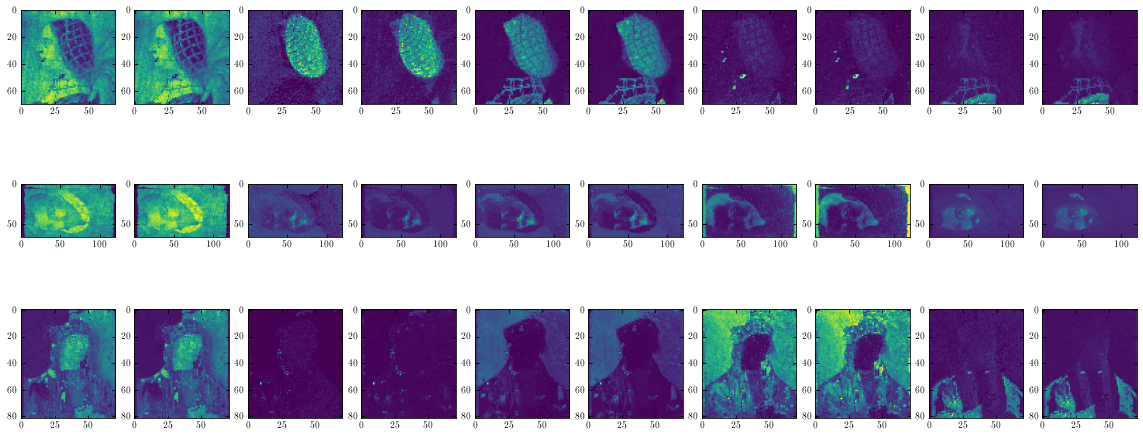

In [30]:
fig,ax = subplots(3,10,figsize=(20,8))
for i in range(5):

    ax[0,2*i].imshow(giulia[:,:,i],vmin=0,vmax = giulia[:,:,i].max())
    ax[1,2*i].imshow(elgreco[:,:,i],vmin=0,vmax = elgreco[:,:,i].max())
    ax[2,2*i].imshow(henry[:,:,i],vmin=0,vmax = henry[:,:,i].max())

    ax[0,2*i+1].imshow(data_giulia.labels[:,:,i],vmin=0,vmax = giulia[:,:,i].max())
    ax[1,2*i+1].imshow(data_elgreco.labels[:,:,i],vmin=0,vmax = elgreco[:,:,i].max())
    ax[2,2*i+1].imshow(data_henry.labels[:,:,i],vmin=0,vmax = henry[:,:,i].max())

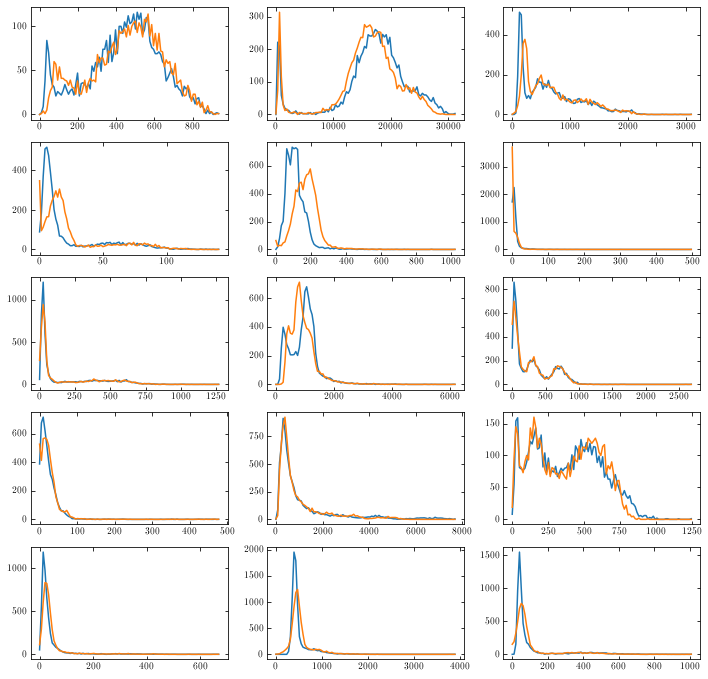

In [31]:
%matplotlib inline
elgreco_labels = data_elgreco.labels.reshape(-1,5)
giulia_labels = data_giulia.labels.reshape(-1,5)
henry_labels = data_henry.labels.reshape(-1,5)

img_elgreco_labels = elgreco.reshape(-1,5)
img_giulia_labels = giulia.reshape(-1,5)
img_henry_labels = henry.reshape(-1,5)

fig,ax = subplots(5,3,figsize=(12,12))

for i in range(5):
    m = maximum(giulia_labels.max(axis=0),img_giulia_labels.max(axis=0))
    
    ry,rx = histogram(giulia_labels[:,i],bins=100,range=(0,m[i]))
    iy,ix = histogram(img_giulia_labels[:,i],bins=100,range=(0,m[i]))

    ax[i,0].plot(rx[:-1],ry)
    ax[i,0].plot(ix[:-1],iy)
    
    m = maximum(elgreco_labels.max(axis=0),img_elgreco_labels.max(axis=0))
                
    ry,rx = histogram((elgreco_labels[:,i]),bins=100,range=(0,m[i]))
    iy,ix = histogram((img_elgreco_labels[:,i]),bins=100,range=(0,m[i]))

    ax[i,1].plot(rx[:-1],ry)
    ax[i,1].plot(ix[:-1],iy)
    
    m = maximum(henry_labels.max(axis=0),img_henry_labels.max(axis=0))
    
    ry,rx = histogram(henry_labels[:,i],bins=100,range=(0,m[i]))
    iy,ix = histogram(img_henry_labels[:,i],bins=100,range=(0,m[i]))

    ax[i,2].plot(rx[:-1],ry)
    ax[i,2].plot(ix[:-1],iy)